Final Project Instructions

Steps 1-2 below are preparatory, while Steps 3-5 should appear in the Jupyter notebook uploaded to GitHub.

1) Get astropy and install it on your system (pip install astropy).

2) Get sep and install it on your system (pip install sep).

3) Follow the tutorial found at https://sep.readthedocs.io/en/v1.0.x/tutorial.htmlLinks to an external site., but use the astropy fits routines instead of fitsio. Create a notebook that performs the tutorial and comment it using Markdown to explain what it’s doing. Note that the fits image used in the tutorial can be acquired via the sep GitHub account.

4) Augment the tutorial to save each of the four figures to PNG files.

5) Get the f105w band image of the Hubble Ultra Deep Field, which is called

hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits

You can download it from https://archive.stsci.edu/pub/hlsp/hudf12/Links to an external site..

6) Redo the tutorial steps in a second notebook, but on the UDF f105w image. How many sources do you find? Histogram their fluxes.

7) What are the mean, median, and standard deviation of the distribution of fluxes. What is the largest outlier in the distribution, where is it on the image, and how many standard deviations is it away from the mean?

8) Download the f125w and f160w images of the HUDF at the same website, and make a 3-color false image of the UDF using RGB -> f160w, f125w, f105w. Save the image as a PNG.


In [1]:
!pip install sep
!pip install astropy
!pip install fitsio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fitsio: filename=fitsio-1.2.1-cp310-cp310-linux_x86_64.whl size=814908 sha256=396bcde994baecf4f575cc9fcaffbde7ba4e750af48870855b9c7d0d59398b36
  Stored in directory: /root/.cache/pip/wheels/94/70/18/2789914e7e79d73c282daba3cc5e5984c5e9a84962f68bf7bc
Successfully built fitsio


In [2]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse


Install and imports all necessary packages

In [15]:
rcParams['figure.figsize']=[10.,8.]

data = fits.getdata('image.fits')

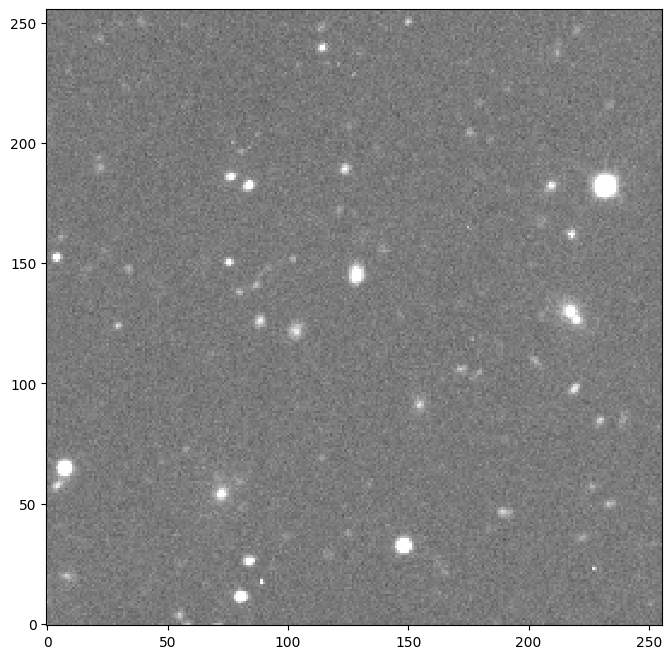

In [4]:
m,s = np.mean(data),np.std(data)

plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.savefig('CyrusCorrelltutorialgraymap.png', dpi=600, bbox_inches='tight')

plots grayscale image of 'image.fits' based off of data scraped from fits file, which is stored in ndarray 'data'

In [5]:
bkg = sep.Background(data)

In [6]:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


prints background and rms of data

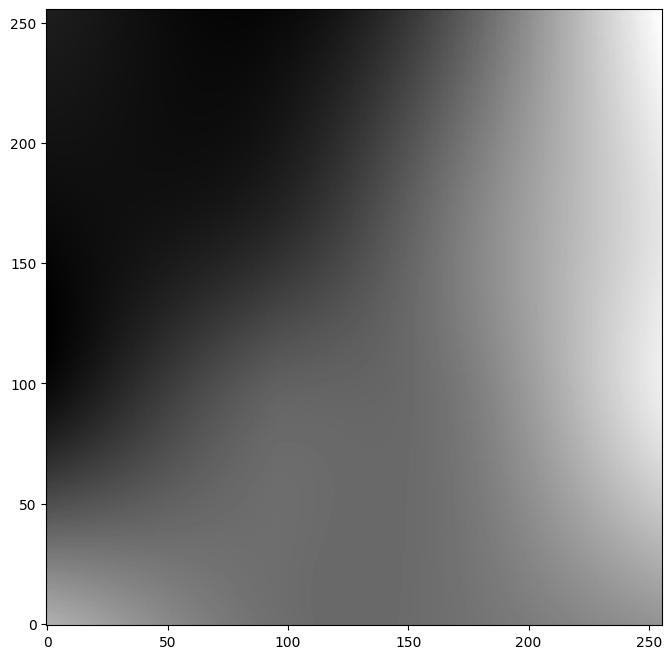

In [7]:
bkgimage=bkg.back()
plt.imshow(bkgimage, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('CyrusCorrellBkgimage.png', dpi=600, bbox_inches='tight')

plots the background of data

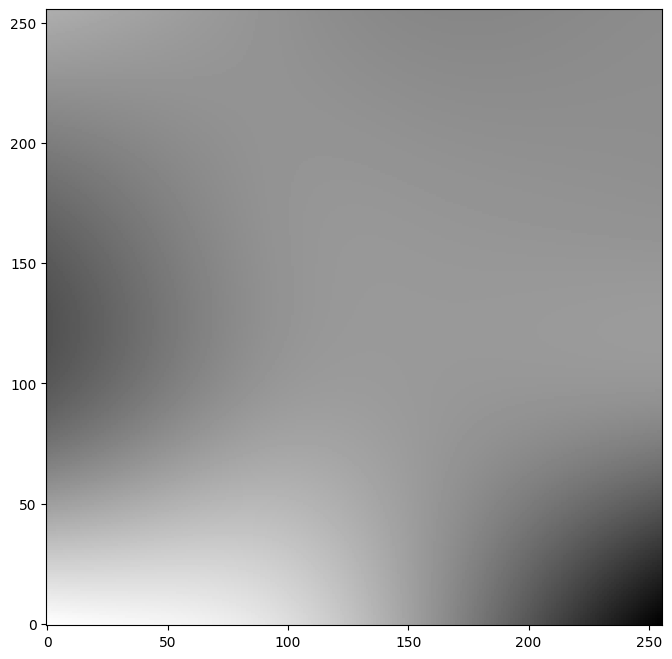

In [8]:
bkgrms=bkg.rms()
plt.imshow(bkgrms, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('CyrusCorrellBkgrms.png', dpi=600, bbox_inches='tight')

plots the background rms of data

In [9]:
datasub=data-bkg

In [10]:
objects=sep.extract(datasub,1.5,err=bkg.globalrms)


creates array 'objects' which contains extracted data from 'data'

In [11]:
len(objects)


69

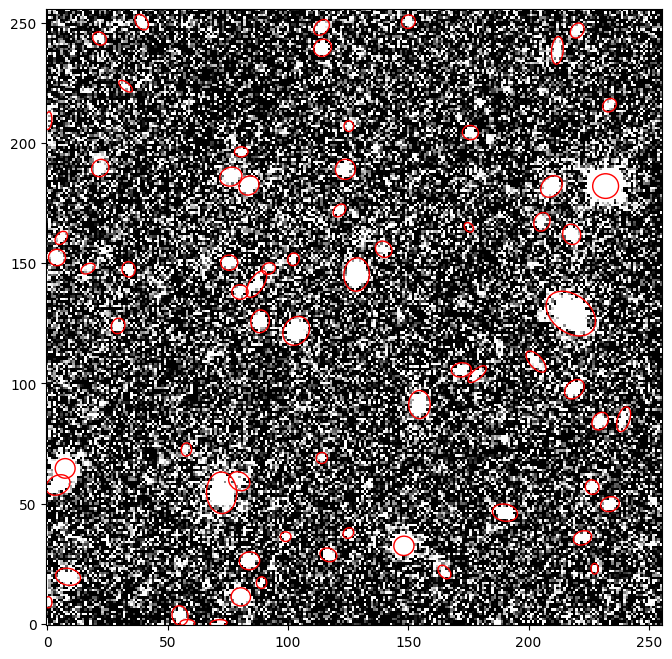

In [12]:
fig,ax=plt.subplots()
m,s = np.mean(datasub),np.mean(datasub)
im = ax.imshow(datasub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('cyruscorrellcircleddata.png', dpi=600, bbox_inches='tight')

plots 'image.fits' with high-flux areas circled in red

In [13]:
flux, fluxerr, flag = sep.sum_circle(datasub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [14]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
